#                                         GRIP: THE SPARKS FOUNDATION

##                                 Data Science and Business Analytics Internship

### Author: Syed Muhammad Murtaza

### Task 1: Prediction using Supervised Machine Learning

#### In this task we have to predict the percentage score of a student based on the number of hours studied. This task can be solved through simple linear regression since it has two variables.

##### Step 1: Importing Libraries

In [42]:
#Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Step 2: Reading the data from given url

In [43]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

#### Step 3: Exploring the data using some pandas functions

In [44]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [45]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Step 4: Evaluating the relationship of hours and scores

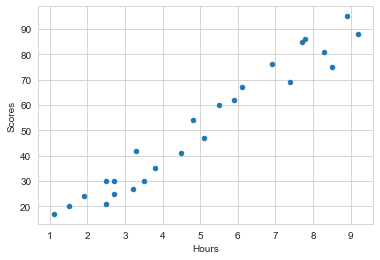

In [47]:
data.plot(kind='scatter',x='Hours',y='Scores')
plt.show()

Above scatter plot shows that there is a linear relationsip between Hours and Scores

In [48]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation co-efficient is used for validating the relationship

As we can see that the correlation coefficient is 0.976 (approximately equals to 1), which means that it is a positive relation, i.e., if the number of hours increase, the score will also increase.

#### Step 5: Plotting Distribution plot

In [49]:
hours = data['Hours']
scores = data['Scores']

<AxesSubplot:xlabel='Hours', ylabel='Density'>

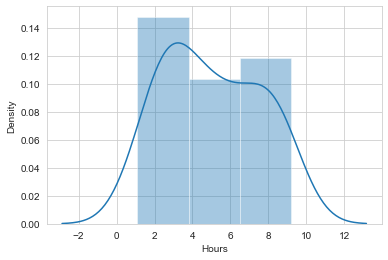

In [50]:
sns.distplot(hours)

<AxesSubplot:xlabel='Scores', ylabel='Density'>

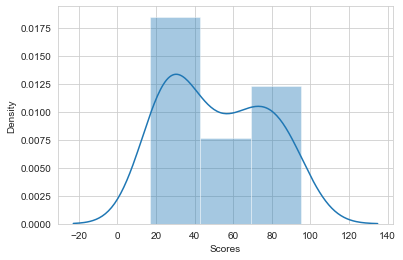

In [51]:
sns.distplot(scores)

The plot shows that their are no outliers in the variables.

#### Step 6: Linear Regression

In [52]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

Now, splitting the data set into training set and testing set. 80% of the dataset is for training the model, rest of the dataset will be used to test the model.

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=60)

In [54]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

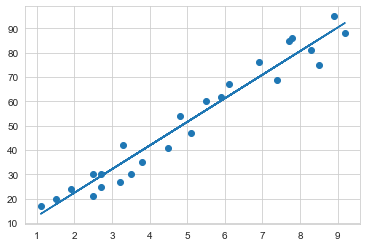

In [55]:
m = reg.coef_
c=reg.intercept_
line=m*X+c
plt.scatter(X,Y)
plt.plot(X,line)
plt.show()

In [56]:
Y_pred = reg.predict(X_test)

In [57]:
actual_predicted = pd.DataFrame({'Target':Y_test,'Predicted':Y_pred})
actual_predicted

,Target,Predicted
0,17,13.765605
1,30,29.271268
2,62,60.282595
3,21,27.333060
4,25,29.271268


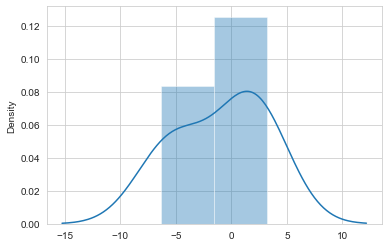

In [58]:
sns.set_style('whitegrid')
sns.distplot(np.array(Y_test-Y_pred))
plt.show()

### Main Task: Predict the score of a student who studies 9.25 hours per day

In [59]:
student_hours=9.25
student_score=reg.predict([[student_hours]])
print("No of Hours = {}".format(student_hours))
print("Predicted Score = {}".format(student_score))

No of Hours = 9.25
Predicted Score = [92.74757781]


#### Final Step: Model Evaluation

In [61]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

MAE = metrics.mean_absolute_error(Y_test,Y_pred)

print('Mean Absolute Error is: ',MAE)

Mean Absolute Error is:  3.256972083783501
